In [23]:

# librerias para la visualizacion y manejo de datos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# librerias para el manejo de texto
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from string import punctuationx
import ast

# libreria para analisis de sentimientos
from nltk.sentiment import SentimentIntensityAnalyzer

# libreria para el manejo de redes
import networkx as nx

from utils import *

In [24]:
df_bernardo = pd.read_csv('data/bernardoArevalo.csv')
df_sandra = pd.read_csv('data/sandraTorres.csv')

In [25]:
# Limpieza de datos

df_bernardo = df_bernardo.drop(df_bernardo.columns[0], axis=1)	# Primera columna no es necesaria
df_bernardo = df_bernardo.apply(lambda x: x.astype(str).str.lower())	# convertir todo a minúscula

if 'id' in df_bernardo.columns:
    df_bernardo = df_bernardo.drop(['id'], axis=1)
df_bernardo = df_bernardo.drop(['id_str'], axis=1)
df_bernardo = df_bernardo.drop(['url'], axis=1)

# Eliminar signos de puntuacion
df_bernardo['rawContent'] = df_bernardo['rawContent'].apply(lambda x: ''.join([i for i in x if i not in punctuation]))

# Eliminar @
df_bernardo['rawContent'] = df_bernardo['rawContent'].str.replace('@', '')
df_bernardo['rawContent'] = df_bernardo['rawContent'].str.replace('#', '')

# Eliminar emoji
df_bernardo['rawContent'] = df_bernardo['rawContent'].apply(lambda x: emoji_pattern.sub(r'', x))
df_bernardo['rawContent'] = df_bernardo['rawContent'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

df_bernardo = df_bernardo[df_bernardo['lang'] == 'es']

# extrayendo nombres de usuario de los tweets
match = lambda user_str: re.search(r"'username':\s*'([^']+)'", user_str)
username_from_str = lambda user_str: match(user_str).group(1) if match(user_str) else None
df_bernardo['tweet_username'] = df_bernardo['user'].apply(username_from_str) 

# extrayendo nombres de usuario mencionados en los tweets
df_bernardo['mentioned_usernames'] = df_bernardo['mentionedUsers'].apply(extract_mentioned_users)



In [26]:
df_bernardo

,date,user,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,conversationId,hashtags,...,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type,tweet_username,mentioned_usernames
0,2023-09-13 23:58:52+00:00,"{'id': 46561608, 'id_str': '46561608', 'url': ...",es,anongtreloaded msemillagt barevalodeleon jajaj...,0,0,2,0,1702088813042954628,[],...,nan,1.7020888130429548e+18,"{'id': 1419402501212811265, 'username': 'anong...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,twitter web app,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.tweet,eltuitdehoy_,"[anongtreloaded, msemillagt, barevalodeleon]"
1,2023-09-13 23:58:24+00:00,"{'id': 1005627722, 'id_str': '1005627722', 'ur...",es,asiervera aztecanoticiagt barevalodeleon repit...,0,1,4,0,1702055546247885225,[],...,nan,1.7020555462478853e+18,"{'id': 291888009, 'username': 'asiervera', 'di...","<a href=""http://twitter.com/#!/download/ipad"" ...",http://twitter.com/#!/download/ipad,twitter for ipad,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.tweet,totitafuentes,"[asiervera, aztecanoticiagt, barevalodeleon]"
2,2023-09-13 16:26:49+00:00,"{'id': 743252657083650048, 'id_str': '74325265...",es,paciente 39 años dolor lumbar 1 año caída 45 s...,2,17,91,0,1701995859229958189,[],...,nan,nan,nan,"<a href=""https://help.twitter.com/en/using-twi...",https://help.twitter.com/en/using-twitter/how-...,advertiser-interface,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.tweet,drdavidcabrera,[]
3,2023-09-13 23:56:55+00:00,"{'id': 1512621569834688513, 'id_str': '1512621...",es,viczacariasgt soy502 barevalodeleon msemillagt...,0,0,0,0,1701791008789250545,[],...,nan,1.7017994428971622e+18,"{'id': 84055675, 'username': 'viczacariasgt', ...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,twitter for android,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.tweet,fernand0483,"[viczacariasgt, soy_502, barevalodeleon, msemi..."
4,2023-09-13 23:56:10+00:00,"{'id': 891058586, 'id_str': '891058586', 'url'...",es,igorbitkov sigan juego ruso invasor enero soli...,1,0,5,0,1701898230408057163,[],...,nan,1.701898230408057e+18,"{'id': 707086237753090048, 'username': 'igor_b...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,twitter for android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.tweet,maxtiger502,"[igor_bitkov, barevalodeleon]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,2022-12-05 17:57:13+00:00,"{'id': 710243881409839104, 'id_str': '71024388...",es,accidente tránsito bulevar madre 13 avenida zo...,1,0,3,0,1599825232885432329,"['ahora', 'tráficogt']",...,nan,nan,nan,"<a href=""https://about.twitter.com/products/tw...",https://about.twitter.com/products/tweetdeck,tweetdeck,"{'photos': [], 'videos': [{'thumbnailurl': 'ht...",snscrape.modules.twitter.tweet,publinewsgt,[amilcarmontejo]
4208,2022-12-05 17:57:09+00:00,"{'id': 40256008, 'id_str': '40256008', 'url': ...",es,accidente tránsito bulevar madre 13 avenida zo...,0,0,10,0,1599825218129858561,"['ahora', 'tráficogt']",...,nan,nan,nan,"<a href=""https://about.twitter.com/products/tw...",https://about.twitter.com/products/tweetdeck,tweetdeck,"{'photos': [], 'videos': [{'thumbnailurl': 'ht...",snscrape.modules.twitter.tweet,emisorasunidas,[amilcarmontejo]
4209,2022-12-05 17:46:43+00:00,"{'id': 213043803, 'id_str': '213043803', 'url'...",es,traficogt patrulla empotrada vía transmetro ht...,9,8,32,0,1599822589555544064,['traficogt'],...,nan,nan,nan,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,twitter for android,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.tweet,luisfergilmejia,[amilcarmontejo]
4210,2022-12-05 13:09:04+00:00,"{'id': 551042687, 'id_str':

In [27]:

# Limpieza de datos

df_sandra = df_sandra.drop(df_sandra.columns[0], axis=1)	# Primera columna no es necesaria
df_sandra = df_sandra.apply(lambda x: x.astype(str).str.lower())	# convertir todo a minúscula
if 'id' in df_sandra.columns:
    df_sandra = df_sandra.drop(['id'], axis=1)
if 'id_str' in df_sandra.columns:
    df_sandra = df_sandra.drop(['id_str'], axis=1)
df_sandra = df_sandra.drop(['url'], axis=1)

# Eliminar signos de puntuacion
df_sandra['rawContent'] = df_sandra['rawContent'].apply(lambda x: ''.join([i for i in x if i not in punctuation]))

# Eliminar @
df_sandra['rawContent'] = df_sandra['rawContent'].str.replace('@', '')
df_sandra['rawContent'] = df_sandra['rawContent'].str.replace('#', '')

# Eliminar emoji
df_sandra['rawContent'] = df_sandra['rawContent'].apply(lambda x: emoji_pattern.sub(r'', x))
df_sandra['rawContent'] = df_sandra['rawContent'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

df_sandra = df_sandra[df_sandra['lang'] == 'es']

# extrayendo nombres de usuario de los tweets
df_sandra['tweet_username'] = df_sandra['user'].apply(username_from_str)

# extrayendo nombres de usuario mencionados en los tweets
df_sandra['mentioned_usernames'] = df_sandra['mentionedUsers'].apply(extract_mentioned_users)


In [28]:
df_sandra

,date,user,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,conversationId,hashtags,...,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type,tweet_username,mentioned_usernames
0,2023-09-12 19:56:32+00:00,"{'id': 1213902343311245313, 'id_str': '1213902...",es,bernardosilvagt barevalodeleon drgiammattei me...,0,0,0,0,1701683348756730305,[],...,nan,1.7016833487567304e+18,"{'id': 3337026291, 'username': 'bernardosilvag...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,twitter for android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.tweet,yeya16155804,"[bernardosilvagt, barevalodeleon, drgiammattei]"
1,2023-09-12 19:55:48+00:00,"{'id': 1420560045323038720, 'id_str': '1420560...",es,awskl mjcabrerar barevalodeleon tseguatemala d...,0,0,0,0,1701648306605117950,[],...,nan,1.7016848890813071e+18,"{'id': 390988524, 'username': '_awskl', 'displ...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,twitter web app,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.tweet,palomin17772524,"[_awskl, mjcabrerar, barevalodeleon, tseguatem..."
3,2023-09-12 19:51:07+00:00,"{'id': 390988524, 'id_str': '390988524', 'url'...",es,palomin17772524 mjcabrerar barevalodeleon tseg...,1,0,0,0,1701648306605117950,[],...,nan,1.7016844593035226e+18,"{'id': 1420560045323038720, 'username': 'palom...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,twitter for android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.tweet,_awskl,"[palomin17772524, mjcabrerar, barevalodeleon, ..."
4,2023-09-12 19:50:27+00:00,"{'id': 454924874, 'id_str': '454924874', 'url'...",es,asolaresm mike051270 barevalodeleon estupido c...,0,0,0,0,1701328136997109939,[],...,nan,1.701329458463138e+18,"{'id': 310913844, 'username': 'asolaresm', 'di...","<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,twitter for iphone,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.tweet,mr_andrew89,"[asolaresm, mike051270, barevalodeleon]"
5,2023-09-12 19:46:53+00:00,"{'id': 390988524, 'id_str': '390988524', 'url'...",es,mjcabrerar palomin17772524 barevalodeleon tseg...,3,0,0,0,1701648306605117950,[],...,nan,1.701648306605118e+18,"{'id': 15400237, 'username': 'mjcabrerar', 'di...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,twitter for android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.tweet,_awskl,"[mjcabrerar, palomin17772524, barevalodeleon, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5779,2022-11-16 14:28:00+00:00,"{'id': 1166137849156198401, 'id_str': '1166137...",es,pmtmuniguate traficogt salir zona 16 lourdes c...,1,0,0,0,1592887211166691330,['traficogt'],...,nan,nan,"{'id': 372126670, 'username': 'amilcarmontejo'...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,twitter for android,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.tweet,feranleu,"[amilcarmontejo, pmtmuniguate]"
5780,2022-11-15 15:27:57+00:00,"{'id': 710243881409839104, 'id_str': '71024388...",es,buses extraurbanos colisionaron 5a avenida 14 ...,0,0,1,0,1592539913391677440,"['ahora', 'tráficogt']",...,nan,nan,nan,"<a href=""https://about.twitter.com/products/tw...",https://about.twitter.com/products/tweetdeck,tweetdeck,"{'photos': [], 'videos': [{'thumbnailurl': 'ht...",snscrape.modules.twitter.tweet,publinewsgt,[amilcarmontejo]
5781,2022-11-15 15:27:55+00:00,"{'id': 40256008, 'id_str': '40256008', 'url': ...",es,buses extraurbanos colisionaron 5a avenida 14 ...,0,0,2,0,1592539903635906562,"['ahora', 'tráficogt']",...,nan,nan,nan,"<a href=""https://about.twitter.com/products/tw...",https://about.twitter.com/products/tweetdeck,tweetdeck,"{'photos': [], 'v

# Análisis exploratorio

## Frecuencia de palabras en tweets - Bernardo Arévalo

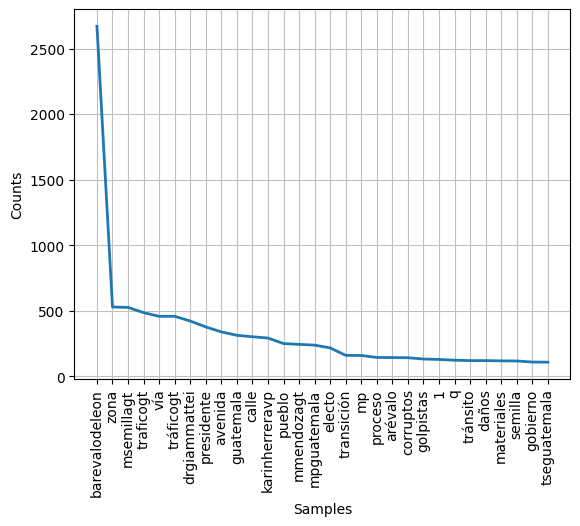

<Axes: xlabel='Samples', ylabel='Counts'>

In [29]:
tweet_words_bernardo = [w for sentence in df_bernardo['rawContent'] for w in sentence.split()]
nlp_words_bernardo =nltk.FreqDist(tweet_words_bernardo)
nlp_words_bernardo.plot(30)

En los tweets de Bernardo Arévalo, las palabras que más resaltan están relacionadas con él mismo, la vicepresidenta candidata Karin Herrera, el partido Semilla, temas presidenciales y el tráfico vehicular.

## Frecuencia de palabras en tweets - Sandra Torres

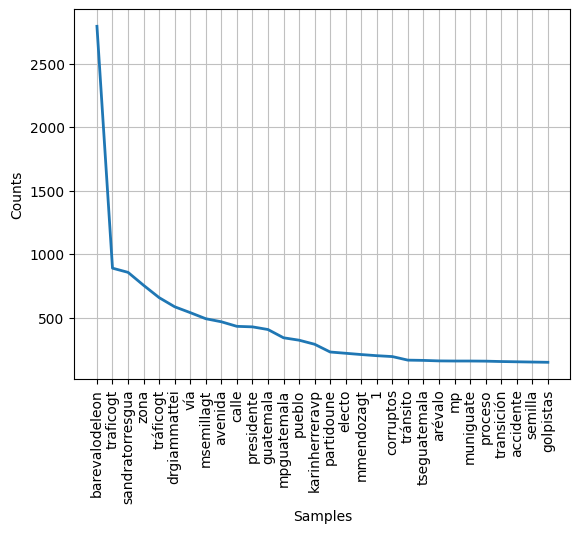

<Axes: xlabel='Samples', ylabel='Counts'>

In [30]:
tweet_words_sandra = [w for sentence in df_sandra['rawContent'] for w in sentence.split()]
nlp_words_sandra = nltk.FreqDist(tweet_words_sandra)
nlp_words_sandra.plot(30)

En el conjunto de datos de tweets de Sandra Torres se observa que sobresale la mención del usuario de Bernardo Arévalo, el tráfico automovilístico, la mención de Sandra Torres y la presidencia. En comparación con el conjunto de datos de tweets de Bernardo Arévalo se menciona menos la palabra presidente.

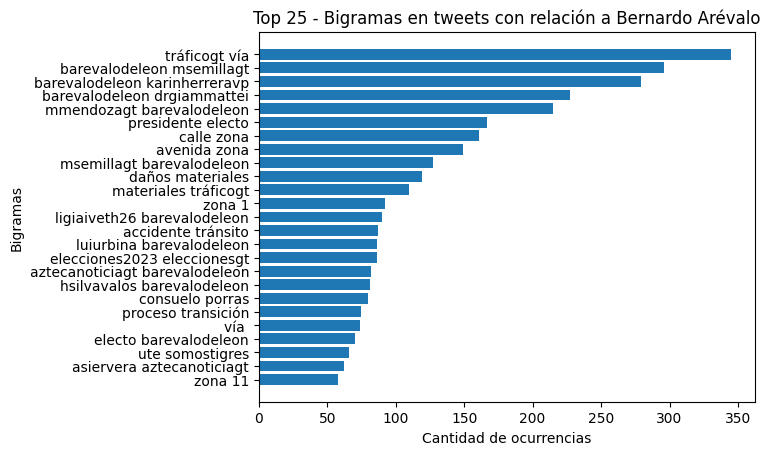

In [31]:
bigrams_bernardo = list(nltk.bigrams(tweet_words_bernardo))
bigram_freq_bernardo = nltk.FreqDist(bigrams_bernardo)
top_bigrams_bernardo = bigram_freq_bernardo.most_common(25)
bigrams_b = [' '.join(bigram) for bigram, freq in top_bigrams_bernardo]
freq_b = [freq for bigram, freq in top_bigrams_bernardo]

plt.barh(bigrams_b, freq_b)
plt.xlabel('Cantidad de ocurrencias')
plt.ylabel('Bigramas')
plt.title('Top 25 - Bigramas en tweets con relación a Bernardo Arévalo')
plt.gca().invert_yaxis()
plt.show()


Vemos que aún tiene relevancia el tráfico en relación a la cantidad de ocurrencias. Por otra parte, predomina el bigrama de Bernardo Arévalo y el partido Semilla y el binomio presidenciable del partido Semilla.

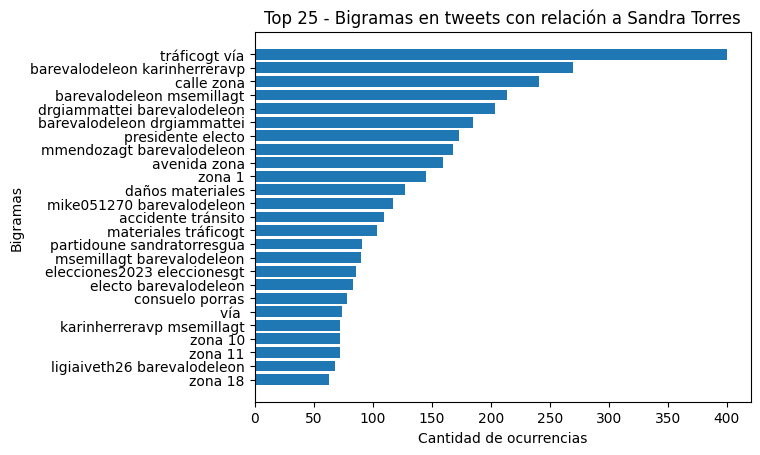

In [32]:
bigrams_sandra = list(nltk.bigrams(tweet_words_sandra))
bigram_freq_sandra = nltk.FreqDist(bigrams_sandra)
top_bigrams_sandra = bigram_freq_sandra.most_common(25)
bigrams_s = [' '.join(bigram) for bigram, freq in top_bigrams_sandra]
freq_s = [freq for bigram, freq in top_bigrams_sandra]

plt.barh(bigrams_s, freq_s)
plt.xlabel('Cantidad de ocurrencias')
plt.ylabel('Bigramas')
plt.title('Top 25 - Bigramas en tweets con relación a Sandra Torres')
plt.gca().invert_yaxis()
plt.show()


En el conjunto de datos de tweets que involucran a Sandra Torres vemos que no sobresalen tantos bigramas en relación a ella si no más bien a Bernardo Arévalo.

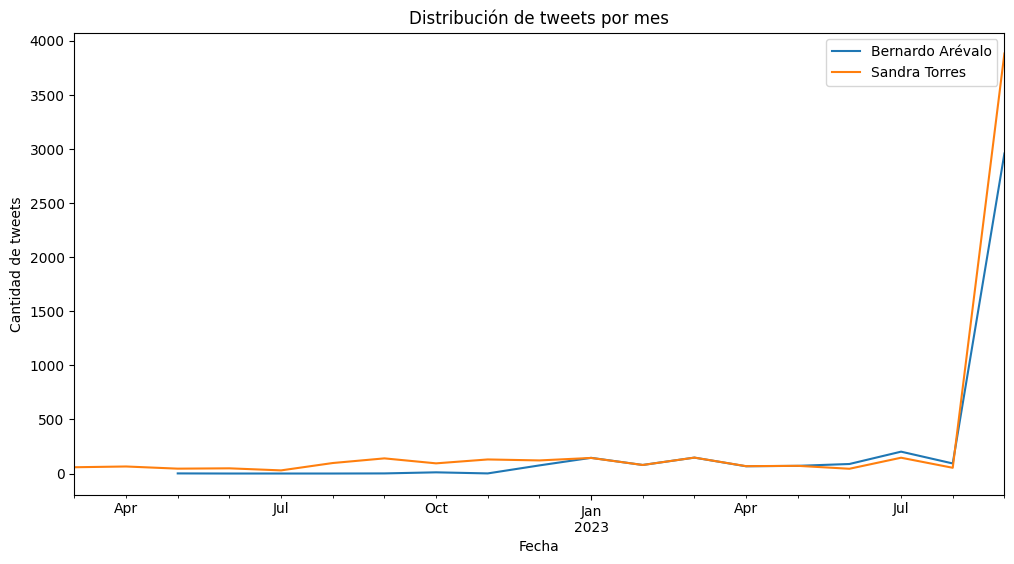

In [33]:
df_bernardo.loc[:, 'date'] = pd.to_datetime(df_bernardo['date'])
df_sandra.loc[:, 'date'] = pd.to_datetime(df_sandra['date'])

tweets_freq_month_b = df_bernardo.resample('M', on='date').size()
tweets_freq_month_s = df_sandra.resample('M', on='date').size()

plt.figure(figsize=(12, 6))
tweets_freq_month_b.plot(label='Bernardo Arévalo')
tweets_freq_month_s.plot(label='Sandra Torres')
plt.title('Distribución de tweets por mes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de tweets')
plt.legend()
plt.show()


Se observa que los tweets que involucran tanto a Bernardo Arévalo como Sandra Torres tuvieron su pico más alto en agosto del 2023. Aunque los tweets que involucran a Sandra Torres han tenido una frecuencia ligeramente mayor, los hallazgos anteriores sugieren que una gran proporción de estos está relacionada con Bernardo Arévalo y el partido Semilla.

## ¿La opinión pública de cada uno de los candidatos es en su mayoría positiva o negativa?

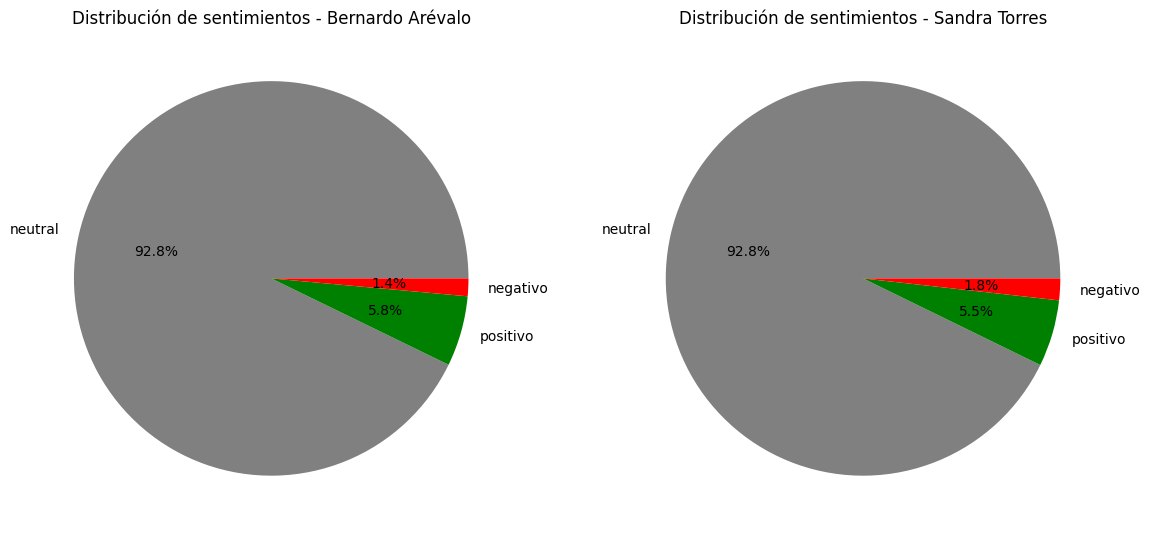

In [34]:

sia = SentimentIntensityAnalyzer()
df_bernardo['compound_score'] = df_bernardo['rawContent'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_sandra['compound_score'] = df_sandra['rawContent'].apply(lambda x: sia.polarity_scores(x)['compound'])

df_bernardo['sentiment'] = df_bernardo['compound_score'].apply(lambda x: 'positivo' if x > 0.05 else 'negativo' if x < -0.05 else 'neutral')
df_sandra['sentiment'] = df_sandra['compound_score'].apply(lambda x: 'positivo' if x > 0 else 'negativo' if x < 0 else 'neutral')

sentiment_values_bernardo = df_bernardo['sentiment'].value_counts()
plt.figure(figsize=(14, 10))
plt.subplot(1, 2, 1)

sentiment_values_bernardo.plot.pie(autopct='%1.1f%%', colors=['gray', 'green', 'red'])
plt.title('Distribución de sentimientos - Bernardo Arévalo')
plt.ylabel('')

sentiment_values_sandra = df_sandra['sentiment'].value_counts()
plt.subplot(1, 2, 2)
sentiment_values_sandra.plot.pie(autopct='%1.1f%%', colors=['gray', 'green', 'red'])
plt.title('Distribución de sentimientos - Sandra Torres')
plt.ylabel('')

plt.show()



Se ve que en su mayoría la opinión pública de los candidatos fue neutra, no obstante se ve que para los tweets de Bernardo Arévalo hay un mayor porcentaje de positividad. 

## ¿Encontró algún influencer? - Tweets: Bernardo Arévalo

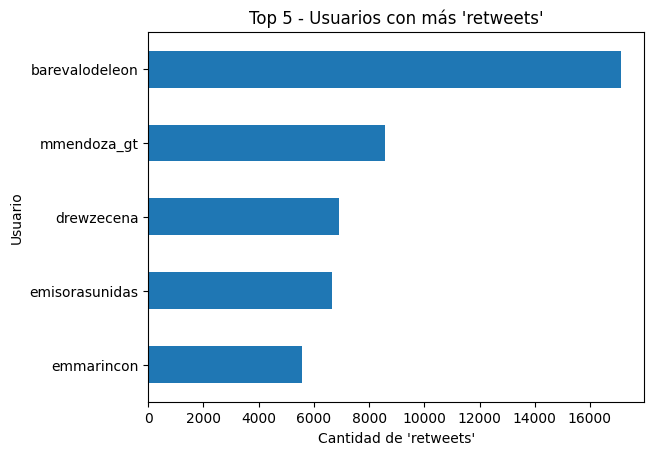

In [35]:
df_bernardo['retweetCount'] = df_bernardo['retweetCount'].astype(int)
retweets_per_user_b = df_bernardo.groupby('tweet_username')['retweetCount'].sum()
top_users = retweets_per_user_b.sort_values(ascending=False)

top_users.head(5).plot.barh()
plt.gca().invert_yaxis()
plt.xlabel('Cantidad de \'retweets\'')
plt.ylabel('Usuario')
plt.title('Top 5 - Usuarios con más \'retweets\'')
plt.show()

El usuario con más retweets es Bernardo Arévalo, seguido de mmendoza_gt quien es una reportera, presentadora y periodista activista con 141,100 seguidores aproximadamente. En tercera posición se encuentra drewzcena, una diputada que representa al partido Semilla con 13,300 seguidores aproximadamente. En las posiciones cuarta y quinta, se encuentran Emisoras Unidas, un canal de noticias con 1 millón y medio de seguidores aproximadamente y emmarincon, respectivamente, siendo este último un escritor reconocido, con 296,700 seguidores aproximadamente.

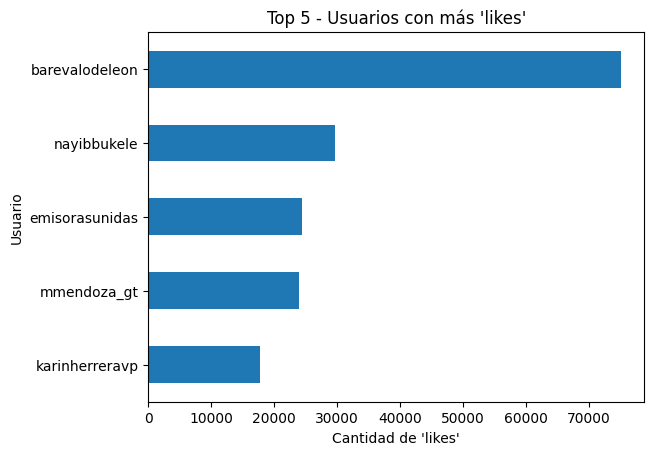

In [36]:
df_bernardo['likeCount'] = df_bernardo['likeCount'].astype(int)
likes_per_user_b = df_bernardo.groupby('tweet_username')['likeCount'].sum()
top_users = likes_per_user_b.sort_values(ascending=False)

top_users.head(5).plot.barh()
plt.gca().invert_yaxis()
plt.xlabel('Cantidad de \'likes\'')
plt.ylabel('Usuario')
plt.title('Top 5 - Usuarios con más \'likes\'')
plt.show()

Vemos que en respecto a la cantidad de 'likes' sigue liderando Bernardo Arévalo y entran a lista nayibbukele el presidente del Salvador y karinherreravp la vicepresindeciable del partido semilla. Por otra parte, se observa que en el top aún se encuentran emisorasunidas y la reportera mmendoza_gt.

## ¿Encontró algún influencer? - Tweets: Sandra Torres

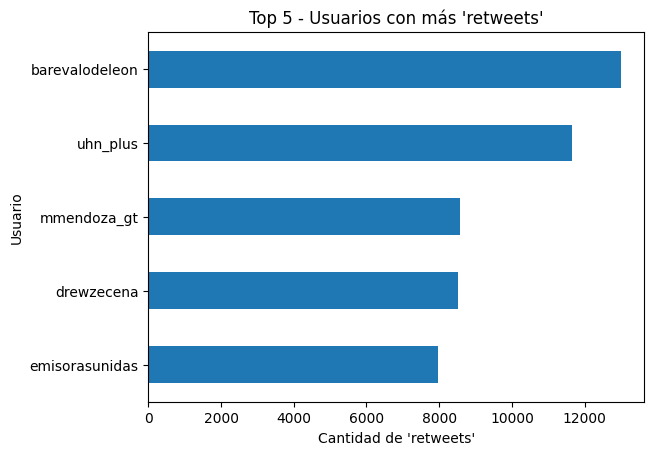

In [37]:
df_sandra['retweetCount'] = df_sandra['retweetCount'].astype(int)
retweets_per_user_s = df_sandra.groupby('tweet_username')['retweetCount'].sum()
top_users = retweets_per_user_s.sort_values(ascending=False)

top_users.head(5).plot.barh()
plt.gca().invert_yaxis()
plt.xlabel('Cantidad de \'retweets\'')
plt.ylabel('Usuario')
plt.title('Top 5 - Usuarios con más \'retweets\'')
plt.show()

A pesar de que los tweets son en relación a Sandra Torres, su usuario no figura en el top 5 de usuarios con más retweets. En cambio, se encuentra en primer lugar el usuario de Bernardo Arévalo. En el listado de usuarios con más retweets, al igual que en el caso de los tweets sobre Bernardo Arévalo, se halla a la periodista mmendoza_gt, el usuario de la diputada drewzecena del partido semilla, y al medio de comunicación emisorasunidas. Además, se encuentra en el top el usuario de uhn_plus, el cual pertenece a un medio dedicado a noticias y eventos globales.

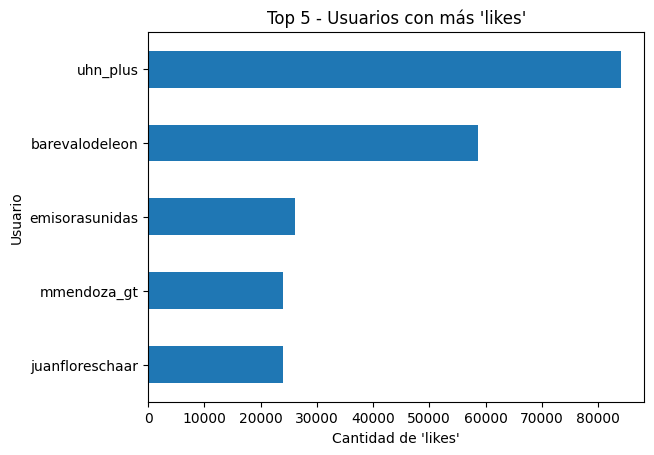

In [38]:
df_sandra['likeCount'] = df_sandra['likeCount'].astype(int)
likes_per_user_s = df_sandra.groupby('tweet_username')['likeCount'].sum()
top_users = likes_per_user_s.sort_values(ascending=False)

top_users.head(5).plot.barh()
plt.gca().invert_yaxis()
plt.xlabel('Cantidad de \'likes\'')
plt.ylabel('Usuario')
plt.title('Top 5 - Usuarios con más \'likes\'')
plt.show()

En el top 5 de usuarios con más likes, lidera uhn_plus seguido del usuario de Bernardo Arévalo. Por otra parte, se resalta que nuevamente el usuario de Sandra Torres no se encuentra en el top 5 de usuarios con más likes.

## ¿Cómo describiría la estructura de la red de cada uno de los candidatos, centralizada o distribuida? - Bernardo Arévalo

In [39]:
# Generando grafo de tweets de Bernardo Arevalo
Graph_Bernardo = nx.DiGraph()

# Agregando nodos
for i, row in df_bernardo.iterrows():
    for obj in (mentioned_users:= row['mentioned_usernames']):
        Graph_Bernardo.add_edge(row['tweet_username'], obj)


In [40]:
clustering_vals_b = nx.clustering(Graph_Bernardo)
f"Coeficiente de agrupación (clustering): % {sum(clustering_vals_b.values()) / len(clustering_vals_b)*100}"

'Coeficiente de agrupación (clustering): % 15.630613639902666'

In [41]:
betweenness_centrality_bernardo = nx.betweenness_centrality(Graph_Bernardo)
top_bridge_nodes_b = sorted(betweenness_centrality_bernardo, key=betweenness_centrality_bernardo.get, reverse=True)

for node in top_bridge_nodes_b[:3]:
    print(f"Usuario:  {node :15} -> Valor: % {betweenness_centrality_bernardo[node]*100 :.4f}")

Usuario:  luiurbina       -> Valor: % 0.0588
Usuario:  asiervera       -> Valor: % 0.0512
Usuario:  ialmgg          -> Valor: % 0.0450


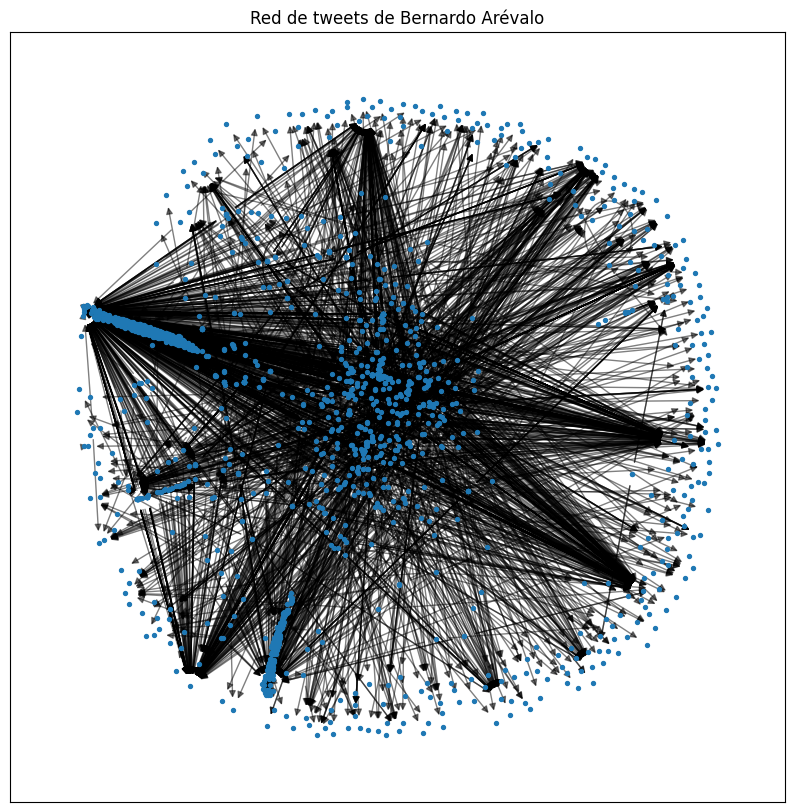

In [48]:
spr_layout = nx.spring_layout(Graph_Bernardo)
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(Graph_Bernardo, spr_layout, node_size=8)
nx.draw_networkx_edges(Graph_Bernardo, spr_layout, alpha=0.5)
plt.title("Red de tweets de Bernardo Arévalo")
plt.show()


La visualización de la red y el coeficiente de agrupamiento relativamente bajo, sugieren una red más distribuida que centralizada. Aunque algunos usuarios muestran tener un valor de centralidad de intermediación, estos valores son bastantes bajos. Esto nos indica que, a pesar de la presencia de ciertos "puentes" entre nodos, no existen figuras dominantes que controlen gran parte del flujo de información en la red, lo cual termina de afirmar que es principalmente una red distribuida.

## ¿Cómo describiría la estructura de la red de cada uno de los candidatos, centralizada o distribuida? - Sandra Torres

In [49]:
# Generando grafo de tweets de Sandra Torres
Graph_Sandra = nx.DiGraph()

# Agregando nodos
for i, row in df_sandra.iterrows():
    for obj in (mentioned_users:= row['mentioned_usernames']):
        Graph_Sandra.add_edge(row['tweet_username'], obj)


In [50]:
clustering_vals_s = nx.clustering(Graph_Sandra)
f"Coeficiente de agrupación (clustering): % {sum(clustering_vals_s.values()) / len(clustering_vals_s)*100}"

'Coeficiente de agrupación (clustering): % 15.205947189661003'

In [51]:
betweenness_centrality_sandra = nx.betweenness_centrality(Graph_Sandra)
top_bridge_nodes_s = sorted(betweenness_centrality_sandra, key=betweenness_centrality_sandra.get, reverse=True)

for node in top_bridge_nodes_s[:3]:
    print(f"Usuario:  {node :15} -> Valor: % {betweenness_centrality_sandra[node]*100 :.4f}")

Usuario:  viczacariasgt   -> Valor: % 0.1932
Usuario:  luiurbina       -> Valor: % 0.1652
Usuario:  ialmgg          -> Valor: % 0.1193


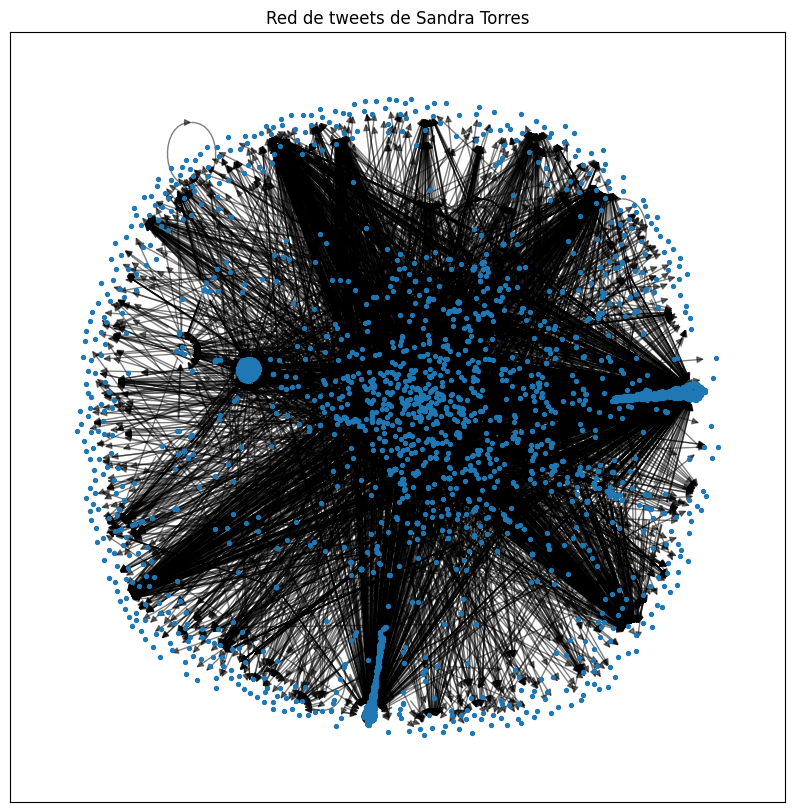

In [53]:
spr_layout = nx.spring_layout(Graph_Sandra)
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(Graph_Sandra, spr_layout, node_size=8)
nx.draw_networkx_edges(Graph_Sandra, spr_layout, alpha=0.5)
plt.title("Red de tweets de Sandra Torres")
plt.show()


La visualización de la red y el coeficiente de agrupamiento relativamente bajo, sugieren una red más distribuida que centralizada. Aunque algunos usuarios muestran tener un valor de centralidad de intermediación, estos valores son bastantes bajos. Esto nos indica que, a pesar de la presencia de ciertos "puentes" entre nodos, no existen figuras dominantes que controlen gran parte del flujo de información en la red, lo cual termina de afirmar que es principalmente una red distribuida.

##  ¿Fue durante su campaña la red social un aspecto importante para influir en la decisión de los guatemaltecos?

Basándose en los hallazgos anteriores es válido intuir que la red social de Twitter influyó significativamente en laa decisión de los guatemaltecos, ya que pudimos ver como Bernardo Arévalo lideró tanto en el top de cantidad de retweets como en el top de cantidad de likes de un tweet, mientras que Sandra Torres ni siquiera se encontró en los tops. Por otra parte, se pudo ver que a pesar de que no hubo una gran diferencia en el porcentaje de sentimientos positivos, Bernardo Arévalo tuvo un leve mayor porcenntaje de positividad en los tweets vínculados con él. Respecto al análisis de frecuencia de anagramas y bigramas se mencionaron más palabras en relación a la presidencia con los tweets vínculados con Bernardo Arévalo que con Sandra Torres. Son los puntos anteriores los que ayudan a terminar de confirmar la red social twitter fue un aspecto importante para influir en la decisión de los guatemaltecos para la elección de un presidente.

## Conclusiones

- Twitter fue un aspecto importante para influir en la decisión de los guatemaltecos para la elección de un presidente.
- Bernardo Arévalo tuvo una mayor influencia en twitter porque tuvo más retweets y likes.
- A lo largo de la campaña hubo una democratización del discurso dado que las redes de tweets tanto de Benardo Arévalo como de Sandra Torres eran principalmente de estructura distribuida en donde no habían nodos centrales dominando las convesarciones.